<a href="https://colab.research.google.com/github/7beunseo/AI-assignment/blob/main/fin/Cifar10/Cifar10_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
X_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1171s 749ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 225s 719ms/step
Train Features Shape: (50000, 512)
Test Features Shape: (10000, 512)
KNN Accuracy: 0.4172


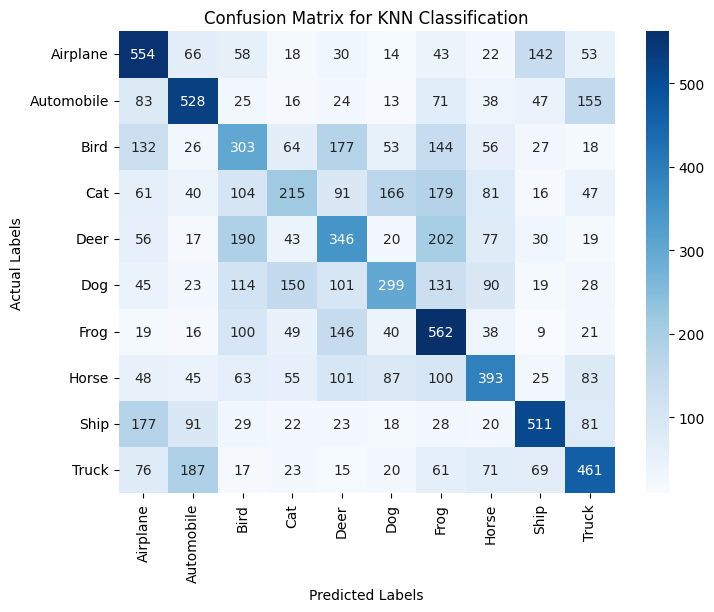

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, BatchNormalization
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# CIFAR-10 데이터 로드
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

# 데이터 정규화
train_images, test_images = X_train / 255.0, X_test / 255.0

# CNN 모델 정의 (특성 추출기로만 사용)
cnn_model = Sequential([
    Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    GlobalAveragePooling2D(),
    keras.layers.Flatten()
])

# CNN 특성 추출
X_train_features = cnn_model.predict(train_images)
X_test_features = cnn_model.predict(test_images)

print("Train Features Shape:", X_train_features.shape)
print("Test Features Shape:", X_test_features.shape)

# KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_features, y_train.flatten())  # 원핫인코딩 제거 -> 정수형 라벨 사용

# KNN 예측 및 평가
y_pred = knn.predict(X_test_features)
knn_accuracy = accuracy_score(y_test.flatten(), y_pred)
print("KNN Accuracy:", knn_accuracy)

# 혼동 행렬 생성
conf_mat = confusion_matrix(y_test.flatten(), y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for KNN Classification')
plt.show()
